In [151]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt 

In [165]:
data_dir = 'C:\\Users\\oem\\Desktop\\isa_projekty\\samoloty\\'

df = pd.read_csv(data_dir + '\\aviationdata.csv', encoding = 'latin-1')

C:\Users\oem\AppData\Local\Temp\ipykernel_24524\3287953234.py:3: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_dir + '\\aviationdata.csv', encoding = 'latin-1')


In [181]:
df.columns


Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date', 'severity2'],
      dtype='object')

In [167]:
df = df[df['Injury.Severity'].notna()]

In [168]:
df['Injury.Severity'].unique()
df['severity2'] = df['Injury.Severity']


In [172]:
df.loc[df['severity2'].str.contains('Non'), 'severity2'] = 'minor'
df.severity2.unique()
df.loc[df['severity2'].str.contains('Fatal'), 'severity2'] = 'fatal'

In [173]:
df.severity2.unique()

array(['fatal', 'minor', 'non-fatal'], dtype=object)

In [174]:
df = df[df['severity2'].str.contains('Unavailable') == False]
df.loc[df['severity2'].str.contains('minor'), 'severity2'] = 'non-fatal'
df.loc[df['severity2'].str.contains('Minor'), 'severity2'] = 'non-fatal'
df.loc[df['severity2'].str.contains('Serious'), 'severity2'] = 'non-fatal'
df.loc[df['severity2'].str.contains('Incident'), 'severity2'] = 'non-fatal'

In [175]:
df.severity2.unique()

array(['fatal', 'non-fatal'], dtype=object)

<Axes: xlabel='severity2', ylabel='count'>

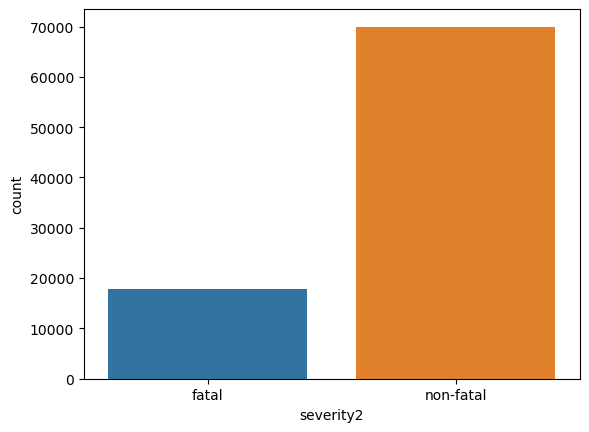

In [176]:
sns.countplot(x='severity2', data=df)

In [177]:
df['Aircraft.damage'].unique()

array(['Destroyed', 'Substantial', 'Minor', nan, 'Unknown'], dtype=object)

In [178]:
df = df = df[df['Aircraft.damage'].str.contains('Unknown') == False]

In [179]:
df['Aircraft.damage'].unique()

array(['Destroyed', 'Substantial', 'Minor'], dtype=object)

<Axes: xlabel='Aircraft.damage', ylabel='count'>

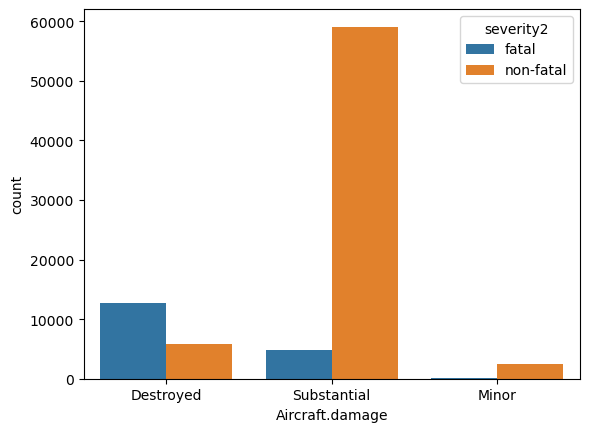

In [180]:
sns.countplot(x='Aircraft.damage', data=df, hue = 'severity2' )

<Axes: xlabel='Number.of.Engines', ylabel='count'>

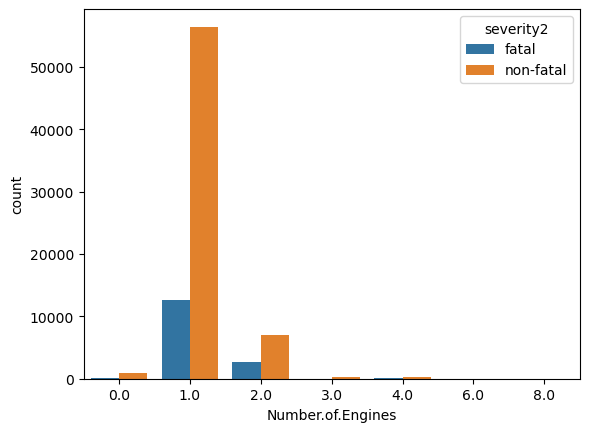

In [182]:
sns.countplot(x='Number.of.Engines', data=df, hue = 'severity2' )

<Axes: xlabel='Amateur.Built', ylabel='count'>

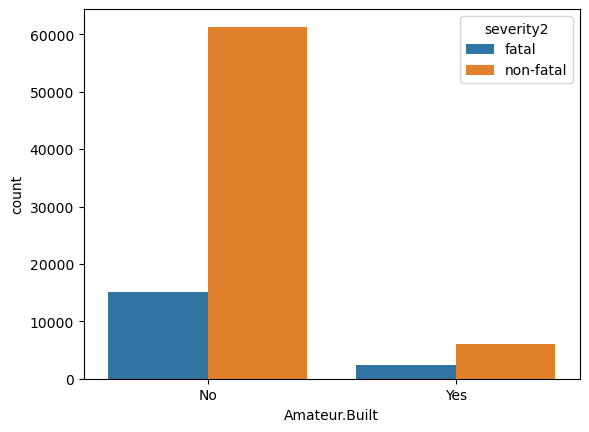

In [185]:
sns.countplot(x='Amateur.Built', data=df, hue = 'severity2' )

<Axes: xlabel='Weather.Condition', ylabel='count'>

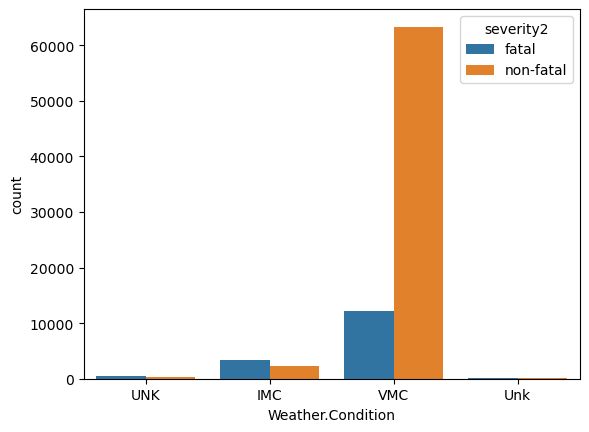

In [189]:
sns.countplot(x='Weather.Condition', data=df, hue = 'severity2' )
#IMC - pilotowanie na instrumentach, słaba widoczność
#VMC - możliwe pilotowanie bez instumentów, dobra widocznosć
#Unk do wywalenia

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Cruise'),
  Text(1, 0, 'Unknown'),
  Text(2, 0, 'Approach'),
  Text(3, 0, 'Climb'),
  Text(4, 0, 'Takeoff'),
  Text(5, 0, 'Landing'),
  Text(6, 0, 'Taxi'),
  Text(7, 0, 'Descent'),
  Text(8, 0, 'Maneuvering'),
  Text(9, 0, 'Standing'),
  Text(10, 0, 'Go-around'),
  Text(11, 0, 'Other')])

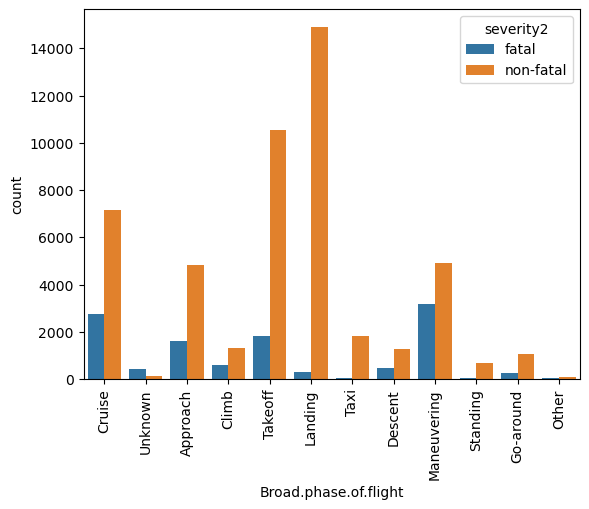

In [193]:
sns.countplot(x='Broad.phase.of.flight', data=df, hue = 'severity2' )
plt.xticks(rotation = 90)